In [1]:
# import relevant/useful libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
# create pandas dataframe with Cesar Vilas precipitation data
dam_precip = pd.read_csv("precip_dam.csv")
dam_precip.head(15)

,year,month,Date,Code,Vol,Precipitaciones
0,1997,1,1/1/1997,35431,156.384000,1.1
1,1997,1,2/1/1997,35432,151.891200,3.2
2,1997,1,3/1/1997,35433,156.600000,9.3
3,1997,1,4/1/1997,35434,144.359712,0.0
4,1997,1,5/1/1997,35435,151.560288,29.0
5,1997,1,6/1/1997,35436,157.319712,4.1
6,1997,1,7/1/1997,35437,129.340800,40.6
7,1997,1,8/1/1997,35438,143.424000,0.6
8,1997,1,9/1/1997,35439,153.360000,0.0
9,1997,1,10/1/1997,35440,129.600000,0.0


In [3]:
# convert date entries to datetime objects using custom format
dam_precip['Date'] = pd.to_datetime(dam_precip['Date'], format = '%d/%m/%Y')
# check it worked
dam_precip.head(15)

,year,month,Date,Code,Vol,Precipitaciones
0,1997,1,1997-01-01,35431,156.384000,1.1
1,1997,1,1997-01-02,35432,151.891200,3.2
2,1997,1,1997-01-03,35433,156.600000,9.3
3,1997,1,1997-01-04,35434,144.359712,0.0
4,1997,1,1997-01-05,35435,151.560288,29.0
5,1997,1,1997-01-06,35436,157.319712,4.1
6,1997,1,1997-01-07,35437,129.340800,40.6
7,1997,1,1997-01-08,35438,143.424000,0.6
8,1997,1,1997-01-09,35439,153.360000,0.0
9,1997,1,1997-01-10,35440,129.600000,0.0


In [4]:
# read in the other set of environmental data
env_df = pd.read_csv("GEnv_NOgaps.csv")

# separate out the relevant measurements
env_df = env_df[["Code","Date5.1", "Site", "Tide", "Si"]].fillna(0)

# convert Date5.1 to datetime object
env_df["Date5.1"] = pd.to_datetime(env_df["Date5.1"])

# keep only data from site 3 and 5
env_df = env_df[(env_df['Site']==3) | (env_df['Site']==5)]

# discard data after 17/11/19 due to inconsistencies
env_df = env_df[env_df['Date5.1'] < '2017-11-19']
env_df = env_df[env_df['Date5.1'] > '1970-01-01']

env_df.head(20)

,Code,Date5.1,Site,Tide,Si
8,131.0,1997-06-19,3,1,2.0
9,132.0,1997-06-19,3,2,4.0
10,133.0,1997-06-19,3,3,3.0
11,134.0,1997-06-19,3,4,3.0
16,151.0,1997-06-19,5,1,19.0
17,152.0,1997-06-19,5,2,4.0
18,153.0,1997-06-19,5,3,20.0
19,154.0,1997-06-19,5,4,7.0
28,231.0,1997-07-06,3,1,2.0
29,232.0,1997-07-06,3,2,5.0


In [5]:
# create 8 dataframes with the salinity at each site and tide

Si_3_1_df = env_df[(env_df['Site']==3) & (env_df['Tide']==1)]
Si_3_2_df = env_df[(env_df['Site']==3) & (env_df['Tide']==2)]
Si_3_3_df = env_df[(env_df['Site']==3) & (env_df['Tide']==3)]
Si_3_4_df = env_df[(env_df['Site']==3) & (env_df['Tide']==4)]

Si_5_1_df = env_df[(env_df['Site']==5) & (env_df['Tide']==1)]
Si_5_2_df = env_df[(env_df['Site']==5) & (env_df['Tide']==2)]
Si_5_3_df = env_df[(env_df['Site']==5) & (env_df['Tide']==3)]
Si_5_4_df = env_df[(env_df['Site']==5) & (env_df['Tide']==4)]

# check it has worked
Si_3_2_df.head()

,Code,Date5.1,Site,Tide,Si
9,132.0,1997-06-19,3,2,4.0
29,232.0,1997-07-06,3,2,5.0
48,332.0,1997-08-05,3,2,8.0
68,432.0,1997-09-03,3,2,4.0
88,532.0,1997-10-03,3,2,3.0


In [6]:
"""
This function in this cell will look at the correlation of the dam release over a certain amount of
days (window size) and with a certain offset from the day the salinity measurement was made (tau).
The results will then be plotted using a gridded heat map.
"""

def dam_salinity(Salinity_df, dam_df):
    
    """
    Inputs:
    Salinity_df - Dataframe containing the salinity measurements and the dates they were taken.
    dam_df - Dataframe containing the dam release values from the period of interest.
    Outputs:
    Correlations - 2D array of correlations 
    """
    
    # get number of days measurements were taken
    n = len(Salinity_df["Date5.1"])
    
    # set maximum number of days to include
    n_days = 30
    
    # initialise array of size (days x days) to save correlations
    correlations = np.zeros((n_days, n_days))
    
    # create array of salinity values
    salinity = Salinity_df["Si"].to_numpy()
    
    # initialise array to save all means
    means = np.zeros((n, n_days, n_days))
    
    # initialise index to keep track
    sample_date_index = 0
    
    # run over each date the window size and offset
    for sample_date in Salinity_df["Date5.1"]:
        
        # create list of n_days dates before sample date in reverse order
        date_list = pd.date_range(end = sample_date, periods = n_days, freq = '1D')[::-1]
        
        j = 0
        
        # set window size to run over
        for window in range(1, (n_days + 1)):
            
            # run over previous n_days days
            for l in range(n_days):
                
                # get dates for window
                dam_release = dam_df[(dam_df["Date"] > (date_list[l] - pd.DateOffset(days = window))) & (dam_df["Date"] <= date_list[l])]
                # get mean from offset with windowsize
                means[sample_date_index,j,l] = dam_release["Vol"].mean()
            
            # update the index for the window size
            j += 1
        
        # update the index for the sample date 
        sample_date_index += 1
        
        
    
    for window_size in range(n_days):
        
        for offset in range(n_days):
            
            correlations[window_size, offset], _ = sp.stats.spearmanr(means[:, window_size, offset], salinity)
            
            
            
    return correlations
#     mask = np.zeros_like(correlations)
#     mask[np.triu_indices_from(mask)] = True
#     sns.heatmap(correlations, cmap = "YlGnBu", mask = mask)
#     #plt.xlabel("Window Size")
#     #plt.ylabel("Start Day of Window")
#     #plt.title("Correlation Dam Release with Salinity S5T4")
#     #plt.savefig('corr_dam_S5_T4.png', dpi=300, bbox_inches='tight')
#     plt.show()

In [7]:
# print('Site 3 Tide 1')
corr31 = dam_salinity(Si_3_1_df, dam_precip)

In [8]:
# print('Site 3 Tide 2')
corr32 = dam_salinity(Si_3_2_df, dam_precip)

In [9]:
# print('Site 3 Tide 3')
corr33 = dam_salinity(Si_3_3_df, dam_precip)

In [10]:
# print('Site 3 Tide 4')
corr34 = dam_salinity(Si_3_4_df, dam_precip)

In [11]:
# print('Site 5 Tide 1')
corr51 = dam_salinity(Si_5_1_df, dam_precip)

In [12]:
# print('Site 5 Tide 2')
corr52 = dam_salinity(Si_5_2_df, dam_precip)

In [13]:
# print('Site 5 Tide 3')
corr53 = dam_salinity(Si_5_3_df, dam_precip)

In [14]:
# print('Site 5 Tide 4')
corr54 = dam_salinity(Si_5_4_df, dam_precip)

In [15]:
"""
This function in this cell will look at the correlation of the dam release over a certain amount of
days (window size) and with a certain offset from the day the salinity measurement was made (tau).
The results will then be plotted using a gridded heat map.
"""

def precip_salinity(Salinity_df, precip_df):
    
    """
    Inputs:
    Salinity_df - Dataframe containing the salinity measurements and the dates they were taken.
    dam_df - Dataframe containing the dam release values from the period of interest.
    Outputs:
    Correlations - 2D array of correlations 
    """
    
    # get number of days measurements were taken
    n = len(Salinity_df["Date5.1"])
    
    # set maximum number of days to include
    n_days = 30
    
    # initialise array of size (days x days) to save correlations
    correlations = np.zeros((n_days, n_days))
    
    # create array of salinity values
    salinity = Salinity_df["Si"].to_numpy()
    
    # initialise array to save all means
    means = np.zeros((n, n_days, n_days))
    
    # initialise index to keep track
    sample_date_index = 0
    
    # run over each date the window size and offset
    for sample_date in Salinity_df["Date5.1"]:
        
        # create list of n_days dates before sample date in reverse order
        date_list = pd.date_range(end = sample_date, periods = n_days, freq = '1D')[::-1]
        
        j = 0
        
        # set window size to run over
        for window in range(1, (n_days + 1)):
            
            # run over previous n_days days
            for l in range(n_days):
                
                # get dates for window
                precipitation = precip_df[(precip_df["Date"] > (date_list[l] - pd.DateOffset(days = window))) & (precip_df["Date"] <= date_list[l])]
                # get mean from offset with windowsize
                means[sample_date_index,j,l] = precipitation["Precipitaciones"].mean()
            
            # update the index for the window size
            j += 1
        
        # update the index for the sample date 
        sample_date_index += 1
        
        
    
    for window_size in range(n_days):
        
        for offset in range(n_days):
            
            correlations[window_size, offset], _ = sp.stats.spearmanr(means[:, window_size, offset], salinity)
            
            
            
    return correlations
#     mask = np.zeros_like(correlations)
#     mask[np.triu_indices_from(mask)] = True
#     sns.heatmap(correlations, cmap = "YlGnBu", mask = mask)
#     #plt.xlabel("Window Size")
#     #plt.ylabel("Start Day of Window")
#     #plt.title("Correlation Dam Release with Salinity S5T4")
#     #plt.savefig('corr_dam_S5_T4.png', dpi=300, bbox_inches='tight')
#     plt.show()

In [16]:
# print('Site 3 Tide 1')
pcorr31 = precip_salinity(Si_3_1_df, dam_precip)

In [17]:
# print('Site 3 Tide 2')
pcorr32 = precip_salinity(Si_3_2_df, dam_precip)

In [18]:
# print('Site 3 Tide 3')
pcorr33 = precip_salinity(Si_3_3_df, dam_precip)

In [19]:
# print('Site 3 Tide 4')
pcorr34 = precip_salinity(Si_3_4_df, dam_precip)

In [20]:
# print('Site 5 Tide 1')
pcorr51 = precip_salinity(Si_5_1_df, dam_precip)

In [21]:
# print('Site 5 Tide 2')
pcorr52 = precip_salinity(Si_5_2_df, dam_precip)

In [22]:
# print('Site 5 Tide 3')
pcorr53 = precip_salinity(Si_5_3_df, dam_precip)

In [23]:
# print('Site 5 Tide 4')
pcorr54 = precip_salinity(Si_5_4_df, dam_precip)

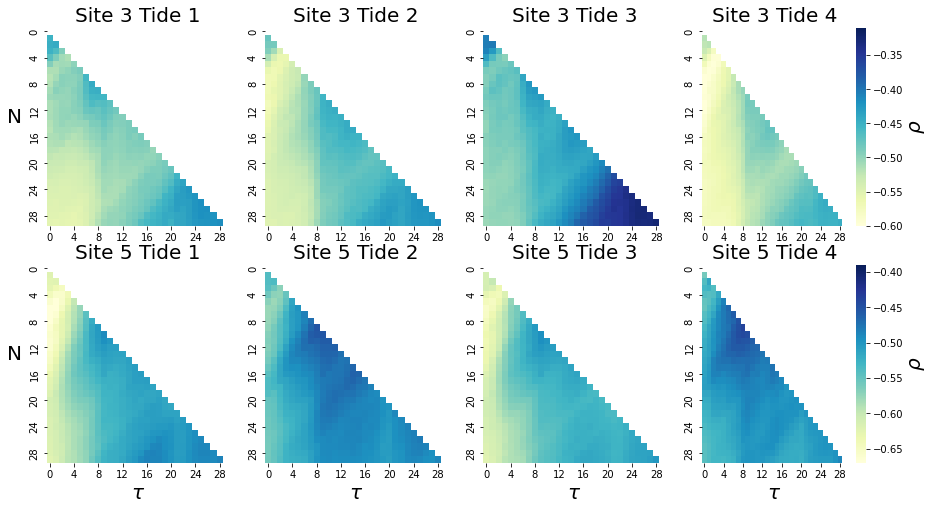

In [40]:
"""
Plot the correlations between dam release and salinity at site 3 and 5 for the different tides.
"""
ticks = np.arange(0,30,2)

mask = np.zeros_like(corr31)
mask[np.triu_indices_from(mask)] = True

vmin1 = -0.6
vmax1 = -0.31

vmin2 = -0.67
vmax2 = -0.39

# set up grid for plots
fig, axs = plt.subplots(figsize = (15,8), nrows = 2, ncols = 4, sharex = False, sharey = False)

plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
plt.rc('figure', titlesize=20)

# plot figures
sns.heatmap(corr31, ax = axs[0,0], cbar = False, cmap = "YlGnBu",
            mask = mask, vmin = vmin1, vmax = vmax1, xticklabels = 4, yticklabels = 4)
sns.heatmap(corr32, ax = axs[0,1], cbar = False, cmap = "YlGnBu",
            mask = mask, vmin = vmin1, vmax = vmax1, xticklabels = 4, yticklabels = 4)
sns.heatmap(corr33, ax = axs[0,2], cbar = False, cmap = "YlGnBu",
            mask = mask, vmin = vmin1, vmax = vmax1, xticklabels = 4, yticklabels = 4)
sns.heatmap(corr34, ax = axs[0,3], cbar = True, cmap = "YlGnBu",
            mask = mask, vmin = vmin1, vmax = vmax1, xticklabels = 4, yticklabels = 4,
            cbar_kws={'label': r'$\rho$'})

sns.heatmap(corr51, ax = axs[1,0], cbar = False, cmap = "YlGnBu",
            mask = mask, vmin = vmin2, vmax = vmax2, xticklabels = 4, yticklabels = 4)
sns.heatmap(corr52, ax = axs[1,1], cbar = False, cmap = "YlGnBu",
            mask = mask, vmin = vmin2, vmax = vmax2, xticklabels = 4, yticklabels = 4)
sns.heatmap(corr53, ax = axs[1,2], cbar = False, cmap = "YlGnBu",
            mask = mask, vmin = vmin2, vmax = vmax2, xticklabels = 4, yticklabels = 4)
sns.heatmap(corr54, ax = axs[1,3], cbar = True, cmap = "YlGnBu",
            mask = mask, vmin = vmin2, vmax = vmax2, xticklabels = 4, yticklabels = 4,
           cbar_kws={'label': r'$\rho$'})


axs[0,0].title.set_text('Site 3 Tide 1')
axs[0,1].title.set_text('Site 3 Tide 2')
axs[0,2].title.set_text('Site 3 Tide 3')
axs[0,3].title.set_text('Site 3 Tide 4')

axs[1,0].title.set_text('Site 5 Tide 1')
axs[1,1].title.set_text('Site 5 Tide 2')
axs[1,2].title.set_text('Site 5 Tide 3')
axs[1,3].title.set_text('Site 5 Tide 4')

axs[0,0].set_ylabel('N', rotation = 0, labelpad = 15)
axs[1,0].set_ylabel('N', rotation = 0, labelpad = 15)

axs[1,0].set_xlabel(r'$\tau$')
axs[1,1].set_xlabel(r'$\tau$')
axs[1,2].set_xlabel(r'$\tau$')
axs[1,3].set_xlabel(r'$\tau$')



# optionally save figures after plotting
#plt.savefig('damsal.png', dpi=300, bbox_inches='tight')
plt.show()

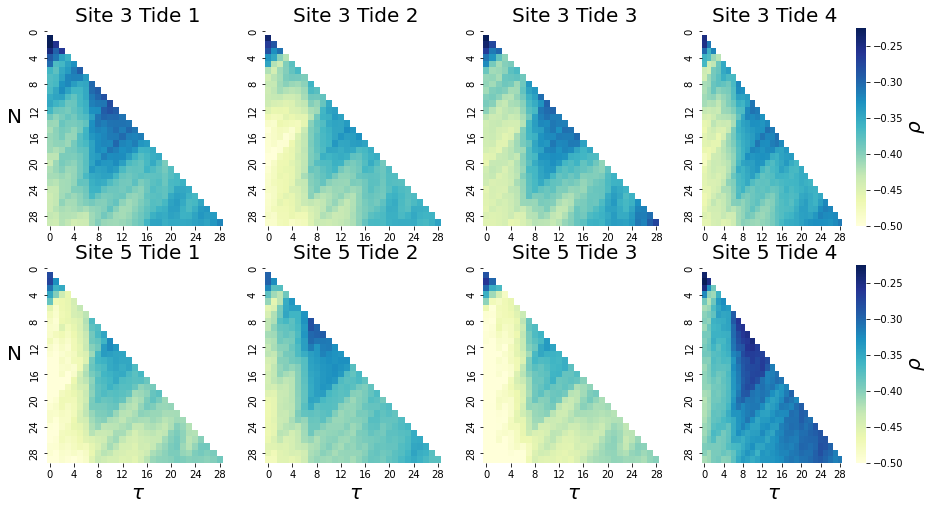

In [41]:
"""
Plot the correlations between precipitation and salinity at site 3 and 5 for the different tides.
"""

mask = np.zeros_like(corr31)
mask[np.triu_indices_from(mask)] = True

vmin1 = -0.5
vmax1 = -0.25

vmin2 = -0.5
vmax2 = -0.225

# set up grid for plots
fig, axs = plt.subplots(figsize = (15,8), nrows = 2, ncols = 4, sharex = False, sharey = False)

plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
plt.rc('figure', titlesize=20)

# plot figures
sns.heatmap(pcorr31, ax = axs[0,0], cbar = False, cmap = "YlGnBu",
            mask = mask, vmin = vmin2, vmax = vmax2, xticklabels = 4, yticklabels = 4)
sns.heatmap(pcorr32, ax = axs[0,1], cbar = False, cmap = "YlGnBu",
            mask = mask, vmin = vmin2, vmax = vmax2, xticklabels = 4, yticklabels = 4)
sns.heatmap(pcorr33, ax = axs[0,2], cbar = False, cmap = "YlGnBu",
            mask = mask, vmin = vmin2, vmax = vmax2, xticklabels = 4, yticklabels = 4)
sns.heatmap(pcorr34, ax = axs[0,3], cbar = True, cmap = "YlGnBu",
            mask = mask, vmin = vmin2, vmax = vmax2, xticklabels = 4, yticklabels = 4,
           cbar_kws={'label': r'$\rho$'})

sns.heatmap(pcorr51, ax = axs[1,0], cbar = False, cmap = "YlGnBu",
            mask = mask, vmin = vmin2, vmax = vmax2, xticklabels = 4, yticklabels = 4)
sns.heatmap(pcorr52, ax = axs[1,1], cbar = False, cmap = "YlGnBu",
            mask = mask, vmin = vmin2, vmax = vmax2, xticklabels = 4, yticklabels = 4)
sns.heatmap(pcorr53, ax = axs[1,2], cbar = False, cmap = "YlGnBu",
            mask = mask, vmin = vmin2, vmax = vmax2, xticklabels = 4, yticklabels = 4)
sns.heatmap(pcorr54, ax = axs[1,3], cbar = True, cmap = "YlGnBu",
            mask = mask, vmin = vmin2, vmax = vmax2, xticklabels = 4, yticklabels = 4,
           cbar_kws={'label': r'$\rho$'})


axs[0,0].title.set_text('Site 3 Tide 1')
axs[0,1].title.set_text('Site 3 Tide 2')
axs[0,2].title.set_text('Site 3 Tide 3')
axs[0,3].title.set_text('Site 3 Tide 4')

axs[1,0].title.set_text('Site 5 Tide 1')
axs[1,1].title.set_text('Site 5 Tide 2')
axs[1,2].title.set_text('Site 5 Tide 3')
axs[1,3].title.set_text('Site 5 Tide 4')


axs[0,0].set_ylabel('N', rotation = 0, labelpad = 15)
axs[1,0].set_ylabel('N', rotation = 0, labelpad = 15)

axs[1,0].set_xlabel(r'$\tau$')
axs[1,1].set_xlabel(r'$\tau$')
axs[1,2].set_xlabel(r'$\tau$')
axs[1,3].set_xlabel(r'$\tau$')


# optionally save figures after plotting
#plt.savefig('precipsal.png', dpi=300, bbox_inches='tight')
plt.show()

In [137]:
print(np.max(pcorr31))
print(np.max(pcorr32))
print(np.max(pcorr33))
print(np.max(pcorr34))
print('break')
print(np.max(pcorr51))
print(np.max(pcorr52))
print(np.max(pcorr53))
print(np.max(pcorr54))

nan
nan
nan
nan
break
nan
nan
nan
nan
